In [1]:
# Base libraries
import os
from os.path import isfile, join
import numpy as np
import random
# NetworkX
import networkx as nx
import osmnx as ox
# OS environment setup
from local_directories import *

In [2]:
# Load Leciester's graph
leicester = ox.io.load_graphml(bulk_storage_directory + "/osmnx/raw/leicester-1864.graphml")

In [3]:
import pandas as pd
from local_directories import *

leicester_embs_df = pd.read_csv(bulk_storage_directory + "/osmnx/embedded/leicester-1864-gnnuf.csv")

In [4]:
leicester_embs_df.head()

,osmnx_node_id,EMB000,EMB001,EMB002,EMB003,EMB004,EMB005,EMB006,EMB007,EMB008,...,EMB054,EMB055,EMB056,EMB057,EMB058,EMB059,EMB060,EMB061,EMB062,EMB063
0,5250472518,0.001379,-0.044323,0.070219,0.033026,-0.028396,0.037515,0.019872,-0.015306,0.052929,...,0.040231,-0.043493,-0.027970,-0.042638,0.006531,0.022836,-0.080140,0.081322,-0.009094,0.028202
1,18968679,-0.007236,0.002836,-0.036133,-0.021762,0.022187,-0.047722,-0.044898,-0.020841,0.027538,...,0.037352,0.006352,0.044234,0.013395,-0.057664,0.023451,-0.021948,0.009855,0.045484,-0.007944
2,1922304065,-0.015457,0.009129,-0.037255,-0.025208,0.018885,-0.043789,-0.048481,-0.018100,0.028592,...,0.037068,0.002819,0.039718,0.015237,-0.051545,0.022036,-0.026631,0.017618,0.052996,-0.004519
3,339379533,-0.033116,0.023940,-0.075835,0.005656,0.029136,-0.025532,-0.011692,0.035875,0.036795,...,0.030710,0.000778,0.032481,0.002055,0.000789,0.038722,-0.008314,-0.019243,0.002829,0.018062
4,1692479172,-0.008434,0.013625,-0.073160,0.018455,0.050683,-0.045604,-0.014392,0.032894,0.035493,...,0.053016,0.005023,0.036585,0.001301,-0.017983,0.043216,0.011908,-0.029144,-0.008680,0.002573


In [5]:
from umap import UMAP
leicester_embs_umap = UMAP(n_neighbors=3, n_components=2, min_dist=0.0, metric='cosine').fit_transform(leicester_embs_df)

/opt/anaconda3/envs/gnn-urban-form/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


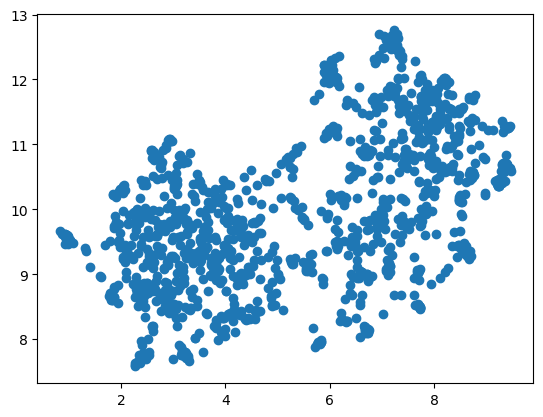

In [6]:
import matplotlib.pyplot as plt
plt.scatter(leicester_embs_umap[:,0], leicester_embs_umap[:,1])
plt.show()

In [7]:
leicester_embs_df["UMAP0"] = leicester_embs_umap[:,0]
leicester_embs_df["UMAP1"] = leicester_embs_umap[:,1]

In [8]:
leicester_embs_df.head()

,osmnx_node_id,EMB000,EMB001,EMB002,EMB003,EMB004,EMB005,EMB006,EMB007,EMB008,...,EMB056,EMB057,EMB058,EMB059,EMB060,EMB061,EMB062,EMB063,UMAP0,UMAP1
0,5250472518,0.001379,-0.044323,0.070219,0.033026,-0.028396,0.037515,0.019872,-0.015306,0.052929,...,-0.027970,-0.042638,0.006531,0.022836,-0.080140,0.081322,-0.009094,0.028202,6.527730,9.102301
1,18968679,-0.007236,0.002836,-0.036133,-0.021762,0.022187,-0.047722,-0.044898,-0.020841,0.027538,...,0.044234,0.013395,-0.057664,0.023451,-0.021948,0.009855,0.045484,-0.007944,2.843548,8.871202
2,1922304065,-0.015457,0.009129,-0.037255,-0.025208,0.018885,-0.043789,-0.048481,-0.018100,0.028592,...,0.039718,0.015237,-0.051545,0.022036,-0.026631,0.017618,0.052996,-0.004519,5.374950,10.875465
3,339379533,-0.033116,0.023940,-0.075835,0.005656,0.029136,-0.025532,-0.011692,0.035875,0.036795,...,0.032481,0.002055,0.000789,0.038722,-0.008314,-0.019243,0.002829,0.018062,6.452013,8.961914
4,1692479172,-0.008434,0.013625,-0.073160,0.018455,0.050683,-0.045604,-0.014392,0.032894,0.035493,...,0.036585,0.001301,-0.017983,0.043216,0.011908,-0.029144,-0.008680,0.002573,8.104294,11.484206


In [9]:
leicester_embs_df[leicester_embs_df["osmnx_node_id"] == 622034915][["UMAP0", "UMAP1"]]

,UMAP0,UMAP1
858,5.723514,7.875012


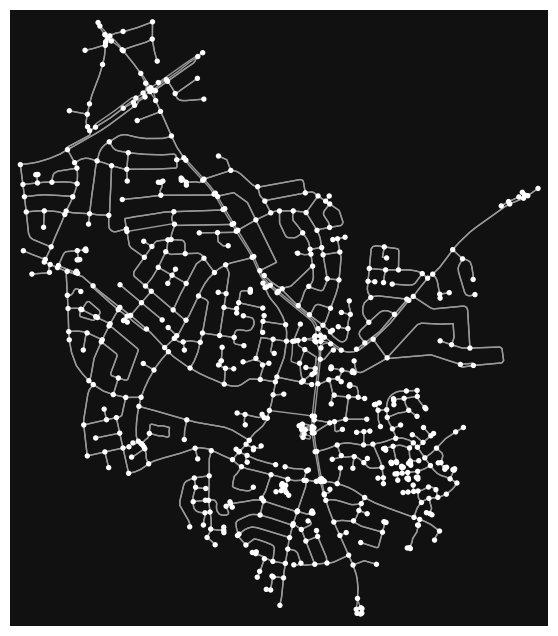

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [10]:
leicester_test01 = nx.generators.ego_graph(leicester, 622034915, radius=2000, undirected=True, distance="length")
leicester_test01_projected = ox.project_graph(leicester_test01)
ox.plot_graph(leicester_test01_projected)

In [11]:
leicester_embs_df[leicester_embs_df["osmnx_node_id"] == 408841504][["UMAP0", "UMAP1"]]

,UMAP0,UMAP1
865,6.853502,12.311646


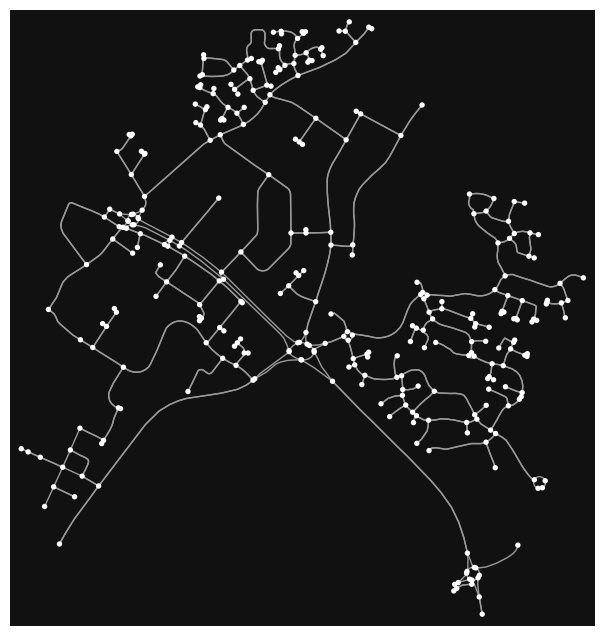

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [12]:
leicester_test02 = nx.generators.ego_graph(leicester, 408841504, radius=1609.34, undirected=True, distance="length")
leicester_test02_projected = ox.project_graph(leicester_test02)
ox.plot_graph(leicester_test02_projected)

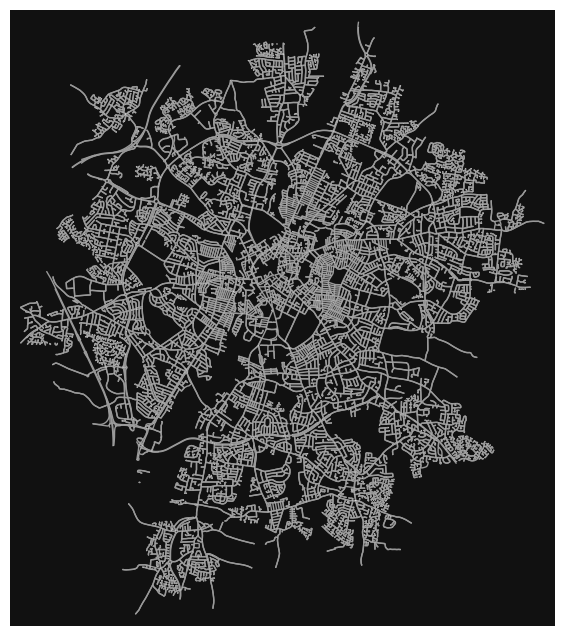

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [13]:
leicester_projected = ox.project_graph(leicester)
ox.plot_graph(leicester_projected, node_size=0.1)

In [14]:
# from sklearn.metrics.pairwise import cosine_similarity
# similarities = cosine_similarity(leicester_embs_np)

In [15]:
# Compare to city centre: 26941963

from scipy import spatial
leicester_embs = leicester_embs_df.copy()
leicester_embs.set_index("osmnx_node_id", inplace=True, drop=True)
leicester_embs = leicester_embs.loc[:,"EMB000":"EMB063"]

for node in leicester.nodes:
    if node in leicester_embs_df["osmnx_node_id"].values:
        leicester.nodes[node]["test_distance"] = 1 - spatial.distance.cosine(
            leicester_embs[leicester_embs.index == 26941963].to_numpy().squeeze(),
            leicester_embs[leicester_embs.index == node].to_numpy().squeeze()
        )
        if node == 26941963:
            leicester.nodes[node]["test_case"] = 1
            print(26941963)
        else:
            leicester.nodes[node]["test_case"] = 0
    else:
        leicester.nodes[node]["test_case"] = None
        leicester.nodes[node]["test_distance"] = None

26941963


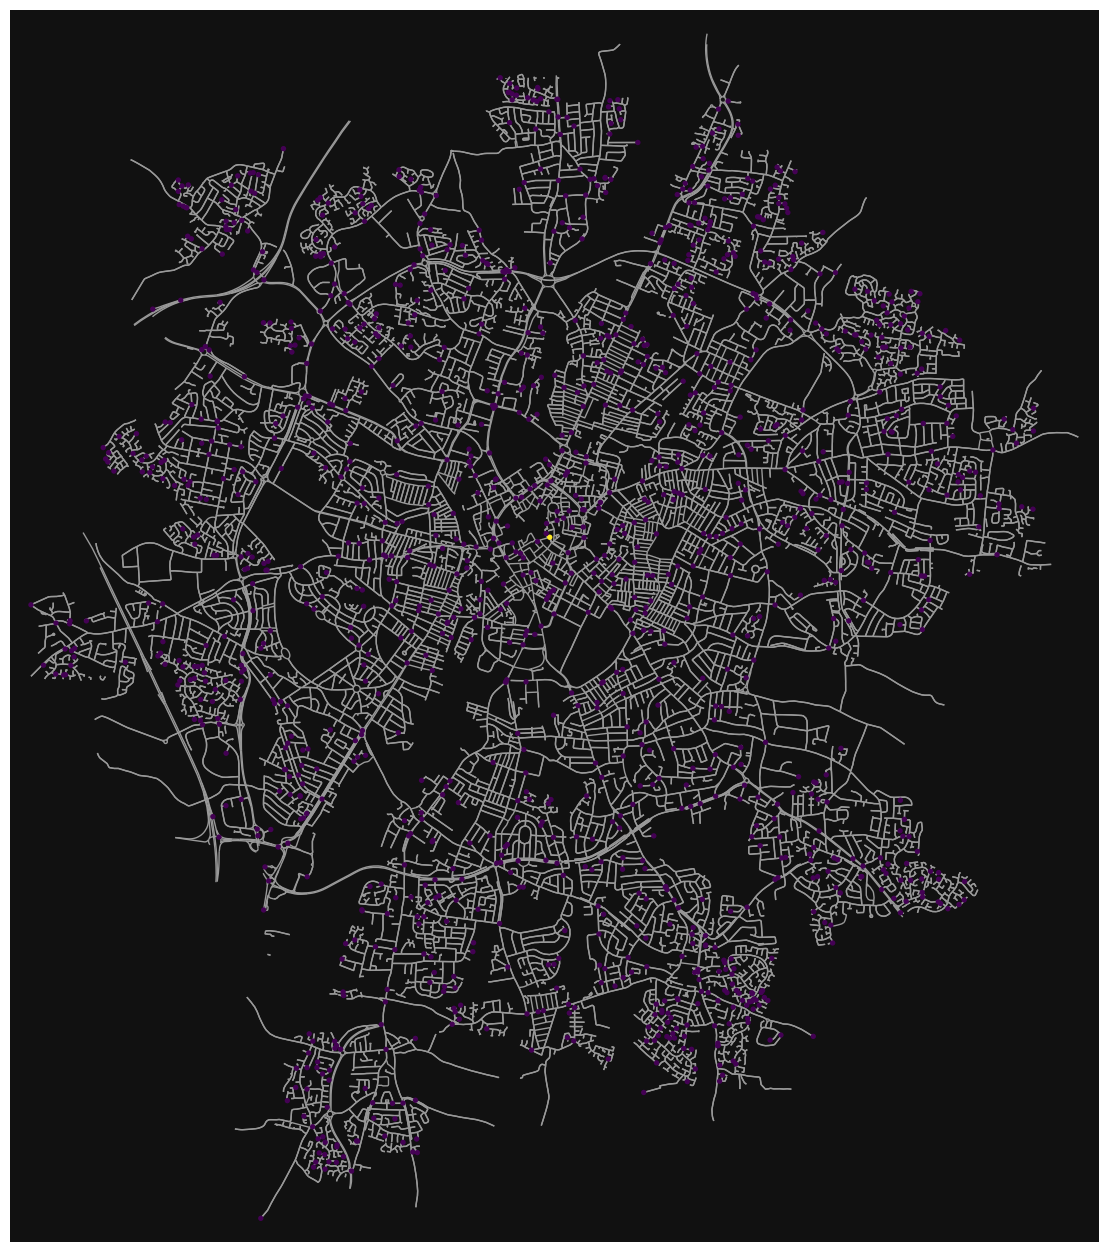

(<Figure size 1600x1600 with 1 Axes>, <Axes: >)

In [16]:
leicester_projected = ox.project_graph(leicester)
ox.plot_graph(leicester_projected, node_color=[leicester.nodes[node]["test_case"] for node in leicester_projected.nodes], figsize=(16, 16))

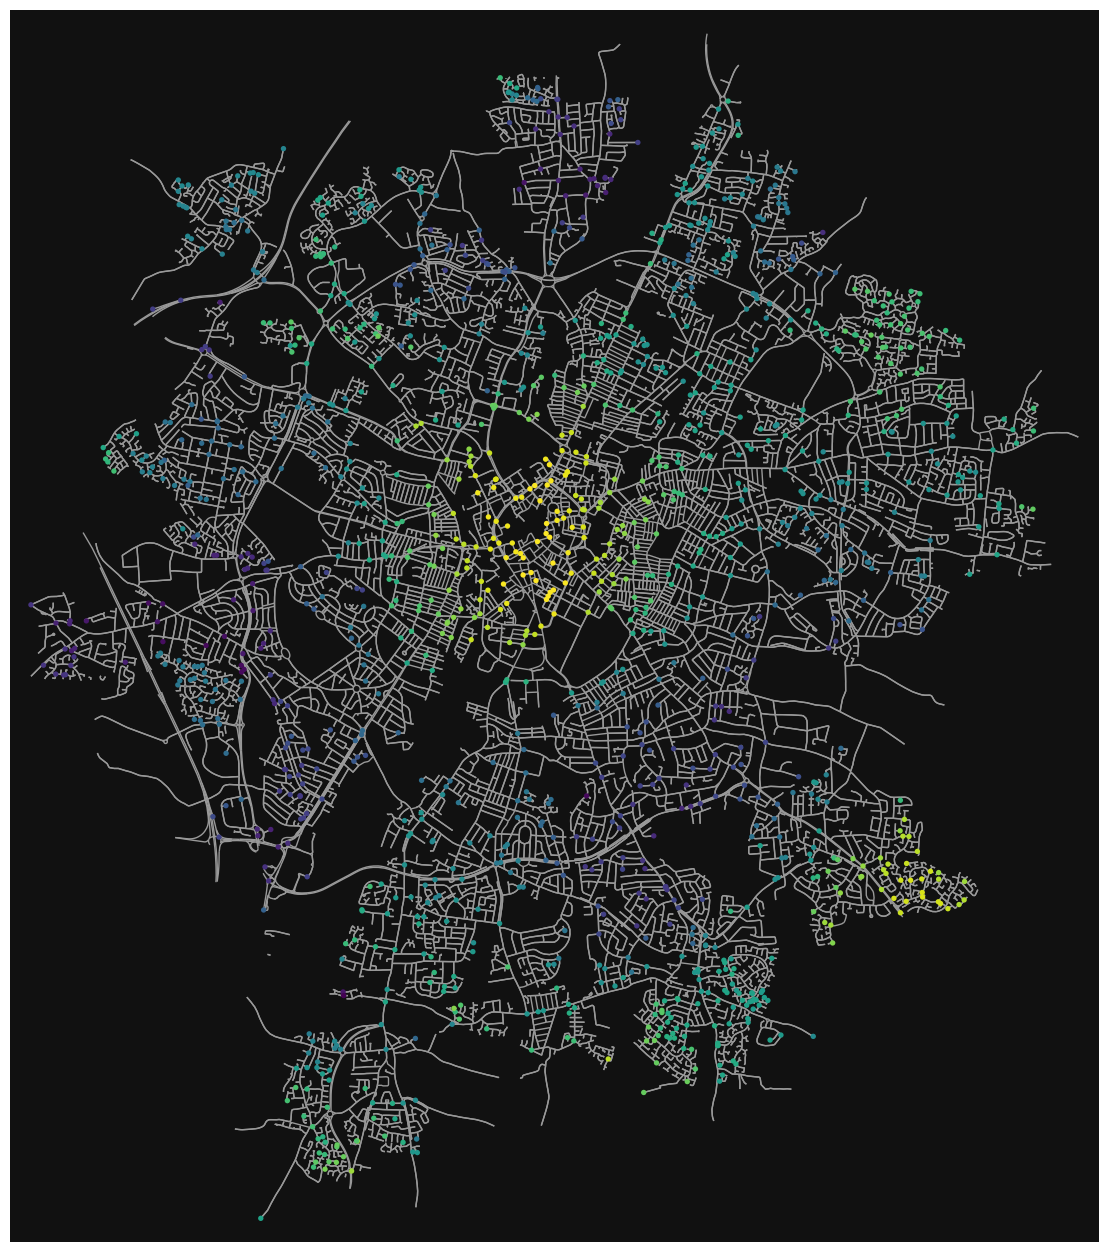

(<Figure size 1600x1600 with 1 Axes>, <Axes: >)

In [17]:
leicester_projected = ox.project_graph(leicester)
ox.plot_graph(leicester_projected, node_color=[leicester.nodes[node]["test_distance"] for node in leicester_projected.nodes], figsize=(16, 16))